アヤメデータを利用したk-means法のサンプルコード。

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

data = load_iris()

n_cluster = 3
model = KMeans(n_clusters=n_cluster)
model.fit(data.data)

print(model.labels_) #各データ点が所属するクラスタ
print(model.cluster_centers_) #fit()によって計算された重心3つ(4つの特徴量それぞれに対しての)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


特徴量(x軸：、y軸:)とそれに対応する重心の描画

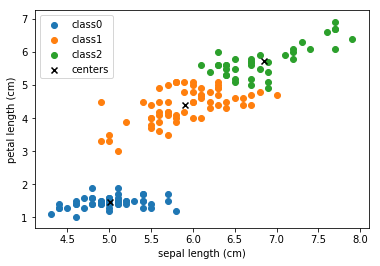

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datas = pd.DataFrame(data.data, columns = data.feature_names) #特徴量をデータフレームへ変換
datas["cluster"] = model.labels_ #cluster列を追加し、データに所属クラスタ情報を格納

#描画用に3種類のデータに分割する
datas_0 = datas[datas["cluster"] == 0]
datas_1 = datas[datas["cluster"] == 1]
datas_2 = datas[datas["cluster"] == 2]

#抽出する軸
x_axis = data.feature_names[0]
y_axis = data.feature_names[2]

#特徴量の描画
plt.scatter(datas_0[x_axis], datas_0[y_axis], label = "class0")
plt.scatter(datas_1[x_axis], datas_1[y_axis], label = "class1")
plt.scatter(datas_2[x_axis], datas_2[y_axis], label = "class2")

#重心の描画
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,2], marker="x", c = "black", label = "centers")

plt.xlabel(x_axis)
plt.ylabel(y_axis)

plt.legend()
plt.show()

クラスタ数を増やしても自動で必要数だけ描画できるように改良

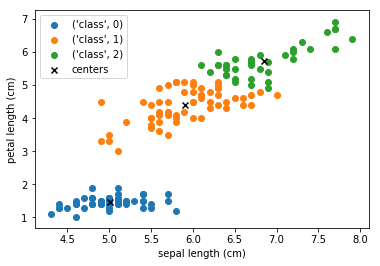

In [155]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris()

n_cluster = 3

model = KMeans(n_clusters=n_cluster)
model.fit(data.data)

datas = pd.DataFrame(data.data, columns = data.feature_names) #特徴量をデータフレームへ変換
datas["cluster"] = model.labels_ #cluster列を追加し、データに所属クラスタ情報を格納
10月ｑ
#抽出する軸
x_axis = data.feature_names[0]
y_axis = data.feature_names[2]
    
for i in range(n_cluster):
    #特徴量の描画
    plt.scatter(datas[datas["cluster"]==i][x_axis], datas[datas["cluster"]==i][y_axis], label = ("class", i))
    
#重心の描画
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,2], marker="x", c = "black", label = "centers")

plt.xlabel(x_axis)
plt.ylabel(y_axis)

plt.legend()
plt.show()

Elbow法によるクラスタ数の最適値を算出、可視化する

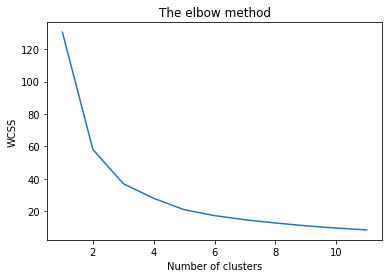

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris()
wcss = []

for i in range(1, 12):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    model.fit(data.data[:, :2])
    wcss.append(model.inertia_) #inertia:kmeansの最適化において最小化すべき指標で、各クラスター内の二乗誤差のこと。

plt.plot(range(1, 12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

3~4あたりがクラスタ数としては最適っぽい